# Homework 1 - Data visualization

## 2017 World Happiness Report from the UN via Kaggle

### Prapatsorn Boontam ID:5988010 Section 2

'Cleaned' the data by removing the dots from variable names because matplotlib exploded when it got dots as a variable name.

In [3]:
import pandas as pd
import seaborn as sb
happy = pd.read_csv('../cs-hw1/2017.csv')
happy.head()

,Country,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,GDPperCapita,Family,LifeExpectancy,Freedom,Generosity,TrustInGovernment,DystopiaResidual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


The data is already sorted, the happiness score is probably out of 10 (from a quick Google search, it is).

In [4]:
happy.isnull().sum()

Country              0
HappinessRank        0
HappinessScore       0
WhiskerHigh          0
WhiskerLow           0
GDPperCapita         0
Family               0
LifeExpectancy       0
Freedom              0
Generosity           0
TrustInGovernment    0
DystopiaResidual     0
dtype: int64

There is no null values in any variables at all

In [5]:
happy.describe()

,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,GDPperCapita,Family,LifeExpectancy,Freedom,Generosity,TrustInGovernment,DystopiaResidual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


The world is pretty neutral-happy based on the mean, but the 2nd quartile is a little bit less than the mean, which probably means the graph skews a tiny bit right. The life expectancy is a bit shocking though, with an average of only ~55 and ~60 at the 2nd quartile. People also aren't very generous and have little trust in their government.

In [6]:
import matplotlib.pyplot as plt
hap = happy.copy()
hap.columns

Index(['Country', 'HappinessRank', 'HappinessScore', 'WhiskerHigh',
       'WhiskerLow', 'GDPperCapita', 'Family', 'LifeExpectancy', 'Freedom',
       'Generosity', 'TrustInGovernment', 'DystopiaResidual'],
      dtype='object')

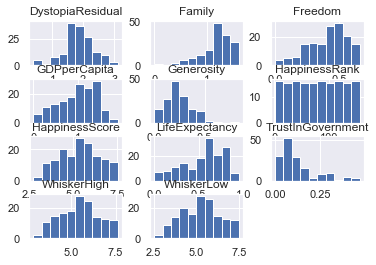

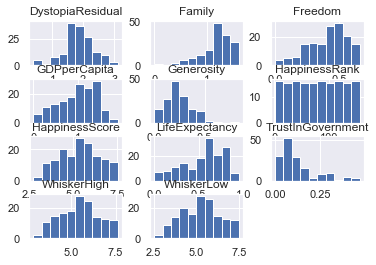

In [9]:
hap.hist()
plt.show()

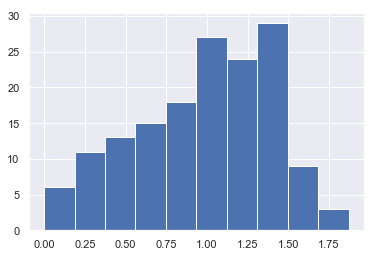

In [10]:
hap.GDPperCapita.hist()
plt.show()

People are pretty wealthy. It is probably a multiply of 100,000 USD from my research (comparing nominal-GDP-per-capita with this dataset).

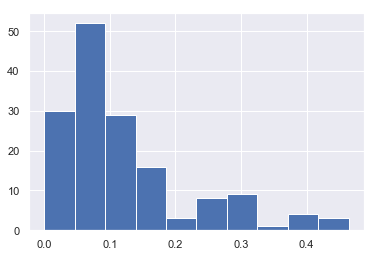

In [11]:
hap.TrustInGovernment.hist()
plt.show()

I don't know what the variable is out of (my guess is 1), and people REALLY have no trust in their government.

I'm curious if the country with higher GDP would trust the government less?

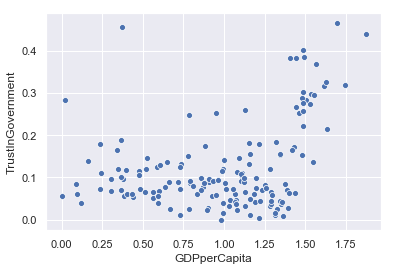

In [16]:
sb.set()
ax = sb.scatterplot(x="GDPperCapita", y="TrustInGovernment", data=happy)
plt.show()

So countries that has very high GDP-per-capita (notice at the ~80% part) would have relatively high trust in their government. Most other countries don't really trust their government at all.

Would countries that have higher GDP would also be more generous?

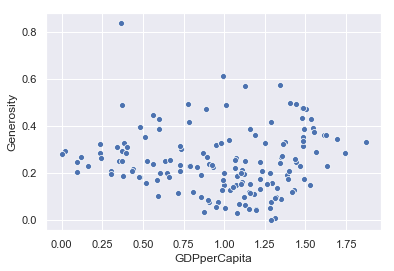

In [18]:
sb.set()
ax=sb.scatterplot(x="GDPperCapita",y="Generosity",data=happy)
plt.show()

Apart from outliers at Generosity=0.8 with also relatively very low GDP, there seems to have no correlation between generosity and GDP.

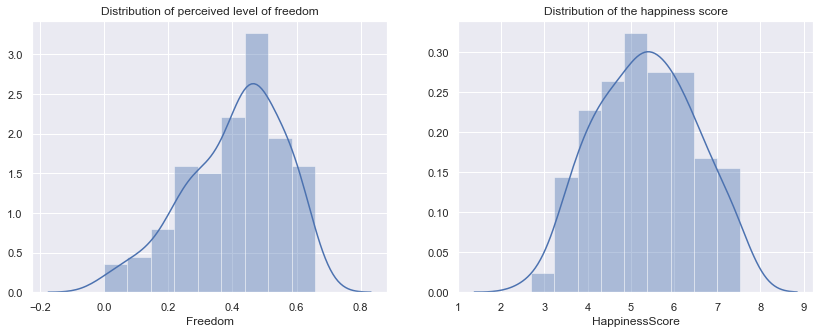

In [23]:
fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sb.distplot(happy.Freedom)
axis.set_title('Distribution of perceived level of freedom')

axis=fi.add_subplot(122)
sb.distplot(happy.HappinessScore)
axis.set_title('Distribution of the happiness score')
plt.show()

There is sort of a correlation between level of freedom and happiness levels, the graphs distributes in a similar way.

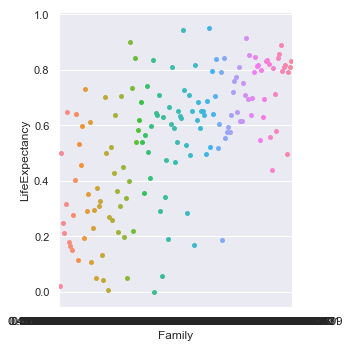

In [34]:
sb.catplot(x="Family", y="LifeExpectancy", kind="swarm", data=happy)
plt.show()

This don't really tell us anything. I initially thought countries that have more children would have less life expectancy but it's not really true.

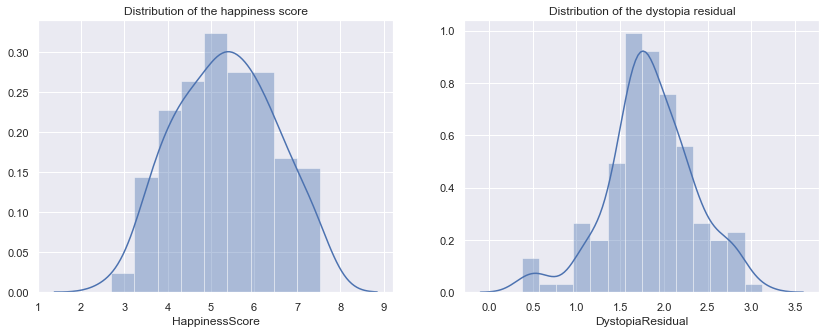

In [38]:
fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sb.distplot(happy.HappinessScore)
axis.set_title('Distribution of the happiness score')

axis=fi.add_subplot(122)
sb.distplot(happy.DystopiaResidual)
axis.set_title('Distribution of the dystopia residual')
plt.show()

This also does show a similar distribution albeit might not actually being very related at all, the dystopia residual is the residual between comparing between dystopia (hypothetical country with the worst values, happiness score of 1.85) and other countries. I think it tells how far that country 'thought' themselves how far until they reach dystopia (which would mean it's related in an opposite way), although that might not be true and the UN didn't specifically surveyed people for that specific question. After reading from multiple websites, I'm still not really sure what the variable meant.